In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datasets import load_from_disk
import os
import seaborn as sns


In [11]:
path = os.getcwd() + '/train_dataset'
data = load_from_disk(path)
train = data['train']
valid = data['validation']



<Axes: ylabel='Count'>

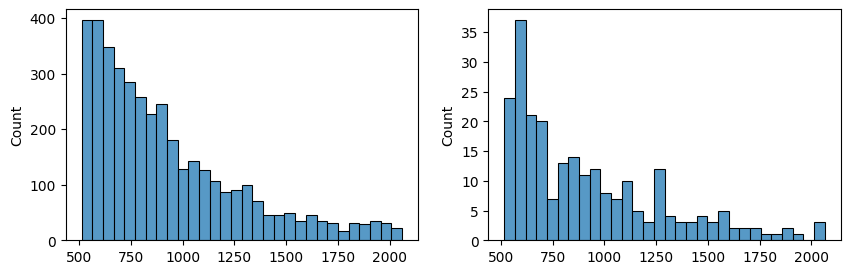

In [12]:
train_context_length = [len(ex) for ex in train['context']]
valid_context_length = [len(ex) for ex in valid['context']]
fig, ax = plt. subplots(1,2, figsize = (10,3))
sns.histplot(train_context_length, bins = 30, ax = ax[0])
sns.histplot(valid_context_length, bins = 30, ax = ax[1])

100%|███████████████████████████████████████| 240/240 [00:00<00:00, 1502.52it/s]


<Axes: ylabel='Count'>

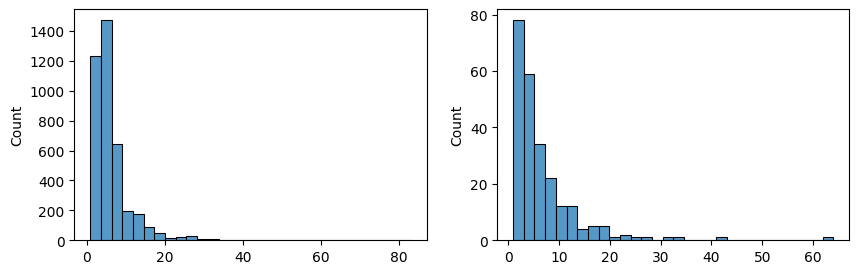

In [13]:
from tqdm import tqdm
train_answer_length = [len(train['answers'][i]['text'][0]) for i in tqdm(range(len(train['answers'])))]
valid_answer_length = [len(valid['answers'][i]['text'][0]) for i in tqdm(range(len(valid['answers'])))]
fig, ax = plt. subplots(1,2, figsize = (10,3))
sns.histplot(train_answer_length, bins = 30, ax = ax[0])
sns.histplot(valid_answer_length, bins = 30, ax = ax[1])

In [167]:
threshold = 20
비정상적으로_긴_답변개수_train = len(list(filter(lambda x: x > threhold, train_answer_length)))
비정상적으로_긴_답변개수_valid = len(list(filter(lambda x: x > threhold, valid_answer_length)))
print(비정상적으로_긴_답변개수_train, 비정상적으로_긴_답변개수_valid)


98 8


In [168]:
import pandas as pd
import re

df = pd.DataFrame({'context' : train['context'],
                   'question' : train['question'],
                     'answers' : [item['text'][0] for item in train['answers']],
                  'context_length' : train_context_length, 
                  'answer_length' : train_answer_length})

def processing(sentence):
    sentence = sentence.replace('\\n', '\n').replace(';', '')
    sentence = re.split(r'\n\*\s*|\n#\s*|\n', sentence)
    return ''.join(sentence)

df['context'] = df['context'].map(processing)
df.describe()

,context_length,answer_length
count,3952.000000,3952.000000
mean,920.220648,6.275051
std,356.500514,5.346842
min,512.000000,1.000000
25%,645.000000,3.000000
50%,819.000000,5.000000
75%,1099.250000,8.000000
max,2059.000000,83.000000


In [161]:
threshold = 30
print('길이가 긴 답변들의 개수 :', len(df[df['answer_length'] > threshold]))
df[df['answer_length'] > threshold]['answers'].head(5)

길이가 긴 답변들의 개수 : 25


58                      ≪인간의 이해: 개념의 집단적 사용 및 진화 (1972)≫
76                〈성당과 시장〉(The Cathedral and the Bazaar)
123                    룬그로 (이탈리아 대륙에 거주하는 아르버레셔인을 위한) 교구
520    "오 그 불쌍한 사람들... 그러나 그건 별로 중요하지 않아요! 중요한건 난 새로운...
544                   최근의 반도의 경제사범 ­국민의 신경제 윤리의 파악을 위하여­
Name: answers, dtype: object

## 길이가 긴 답변들이 꽤 있어 이상치인가 싶었지만, 답이 이상하게 쓰여져 있는 것들은 보이지 않았습니다.

In [172]:
def detect_languages(text):
    language_counter = Counter()
    for word in text.split():
        if len(word) > 0:
            try:
                lang = detect(word)
                language_counter[lang] += 1
            except:
                pass
    return language_counter

df['language'] = df['context'].apply(detect_languages)

print(df[['context', 'language']].head(5))

                                             context  \
0  미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...   
1  '근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...   
2  강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...   
3  불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...   
4  동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...   

                        language  
0  {'ko': 191, 'en': 2, 'de': 1}  
1                    {'ko': 128}  
2                    {'ko': 189}  
3           {'ko': 179, 'vi': 1}  
4        {'ko': 140, 'zh-tw': 1}  


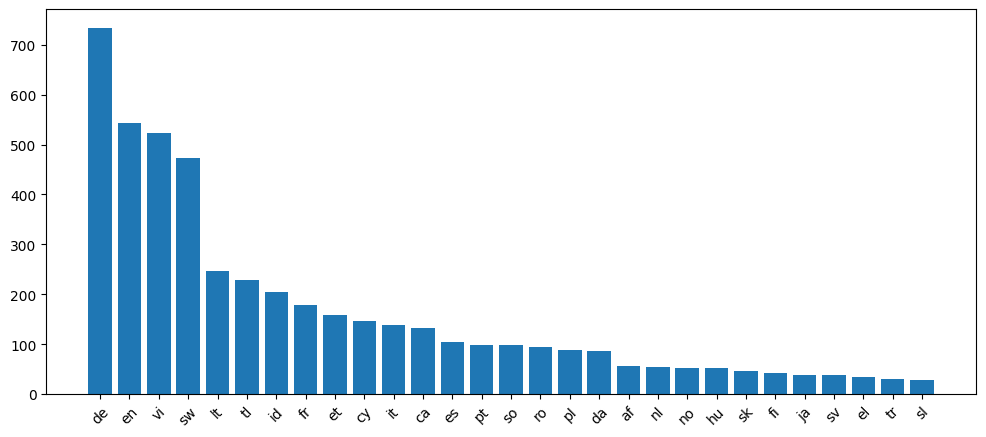

In [159]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/Library/Fonts/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

cnt = df['language'].sum()
cnt = dict(sorted(cnt.items(), key = lambda x: x[1], reverse = True))
fig, ax = plt.subplots(1,1,figsize = (12,5))
plt.bar(list(cnt.keys())[1:30], list(cnt.values())[1:30])
plt.xticks(rotation=45)
plt.show()

## 한국어가 가장 많지만, 독일어나 영어 등 다른 언어 또한 많이 포함돼 있음을 알 수 있습니다.

In [171]:
df['context'].sample(20)

303     콘늘라(Connla) 또는 콘리크(Conlaoch)는 아일랜드 신화의 얼스터 대계의...
2907    19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...
2986    미스터트롯 이후 출연하는 프로그램이 많아지면서 그 동안 숨겨져 있던 장민호에 대한 ...
1616    매복 습격으로 김동한을 사살한 동북항일연군 측의 기록에 의하면, "민족의 망나니"인...
209     아달랴(재위 기원전 841년경-835년경)는 분열 유다 왕국의 7대 왕이자 전왕 아...
2073    윌리어마이트 전쟁은 윌리엄 3세와 메리 2세의 공동 통치가 결정된 이틀 후인 168...
2423    경리는 2012년 1월 11일 나인뮤지스의 싱글 〈News〉를 통해 가수로서 첫 음...
3485    전투는 한밤중에 동맹군의 선봉대가 클로스터 캄펜 수도원과 도랑을 건너는 다리에서 프...
3389    스태튼아일랜드(Staten Island, Staaten Eylandt|스타턴 에일란...
3189    이 문서는 거의 조선 전기의 것으로, 양산이씨의 시조(始祖)인 이전생과 조선 전기 ...
3689    질량 보존 법칙(質量保存法則)은 닫힌 계의 질량은 상태 변화에 상관없이 변하지 않고...
1061    노르망디 침공(노르망디 상륙 작전)은 제2차 세계 대전 당시 연합국이 개시한 가장 ...
2586    통제파(統制派)는 권위주의적 자본주의와 입헌군주제의 유지 또는 강화를 주장했던 일본...
1758    왕페이의 사생활은 매체의 초점이 되었다. 그녀는 당시 홍콩에서 이미 천후급의 인물이...
126     인지심리학의 발달과 함께 확증 편향은 인간의 인지 특징 가운데 하나로 지목되었다. ...
1878    미하일 4세 파플라고니아인(그리스어: Μιχαήλ Δ΄ Παφλαγών, 1010년...
2140    경기와 위황은 먼저 정월 보름날 밤 집안의 장정들을 거느려 왕필을 죽이고 허창을 점...
407     유럽에서 편

In [206]:
path = os.getcwd() + '/train_dataset/wikipedia_documents.json'
wiki = pd.read_json(path).T

In [215]:
print(len(wiki['title'].unique()))
wiki['title'].value_counts().head(10)


31755


title
장면                   146
윤치호                  144
여운형                   96
데카메론의 줄거리             68
루트비히 판 베토벤            66
제1차 세계 대전             66
이명박 정부                64
마음작용 (대승오온론·광오온론)     60
진나라                   58
전주시의 역사               56
Name: count, dtype: int64

## Wiki의 데이터 title은 비교적 고루 분포해 있음을 알 수 있습니다.
### (6만개 중 3만개 이상이 unique한 title이기 때문)


In [226]:
wiki['text_length'] = wiki['text'].apply(lambda x: len(x))
wiki.describe()

,text_length
count,60613.000000
mean,755.565044
std,762.962671
min,184.000000
25%,414.000000
50%,577.000000
75%,857.000000
max,46099.000000


In [231]:
len(wiki[wiki['text_length'] > 5000]['text'])

163

## text의 길이은 평균적으로 755자이지만, 5000자가 넘는 데이터가 몇몇 존재합니다.
## 이는 retrieval의 훈련에 방해될 수 있으므로 나중에 빼도록 합니다.


In [244]:
wiki[wiki['text_length'] < 3000]['text'].to_csv('wiki_under_3000.csv', index = False)

In [247]:
wiki[wiki['text_length'] < 3000]['text'].head(30)

0     이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...
1     이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...
3     아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...
4     저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...
5     아오조라 문고는 자원봉사로 운영되며 열람 역시 무료이다.  서비스 개시 초반에는 보...
6     텍스트 파일을 아오조라 문고에 수록할 때, 텍스트 파일이 갖추어야 할 서식을 '아오...
7     일본어 표기에 많이 쓰이는 올림문자 (후리가나)는 그대로 올려쓰지 않고 '｜'나 '...
8     켄 톰슨(Ken Thompson) 등과 함께 최초의 유닉스(Unix) 시스템을 개발...
9     주기율표(週期律表, 주기률표, periodic table) 또는 주기표(週期表)는 ...
10    수소와 헬륨의 위치에 대한 논쟁이 이어지고 있다. 현재의 주기율표에서는 수소를 알칼...
11    아미노산(amino acid)은 생물의 몸을 구성하는 단백질의 기본 구성 단위로, ...
12    일반적인 α-아미노산의 구조는 오른쪽 그림과 같다.\n\n아미노기와 카복실기를 모두...
13    히라가나(平仮名, ひらがな, Hiragana)는 일본어에서 사용하는 두 가지 가나 ...
14    파이의 날(Pi Day)은 원주율을 기념하는 날이다. 파이의 날은 원주율의 근삿값이...
15    수학에서, 푸리에 급수(Fourier級數, Fourier series)는 주기 함수...
16    통계학은 관찰 및 조사로 얻을 수 있는 데이터로부터, 응용 수학의 기법을 이용해 수...
17    영어의 statistics(통계학, 통계)는 확률을 뜻하는 라틴어의 statisti...
18    매우 다양한 분야의 연구에서 주어진 문제에 대하여 적절한 정보를 수집하고 분

## 위키에는 아주 많은 언어가 섞여있는 것을 관찰할 수 있습니다.
## 다양한 언어를 표현할 수 있는 tokenizer을 사용하는 것이 바람직해 보입니다.